<h2>Neural Network Model</h2>
<ol>

<li>  -standard scaling training and testing feature data </li>
<li>  -3 dense layers(relu,relu,softmax(multi-classification)), dropout data cause of overfitting, </li>
<li>  -wine data sklearn</li>
<li>  -train,test(validation), predict</li>
<li>  -visulization by graphs</li>
</ol>

In [1]:
import pandas as pd 
from sklearn.datasets import load_wine 
import tensorflow as tf

In [17]:
data = load_wine() 
print(data.feature_names)
print(data.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [18]:
X = data.data
y = data.target

print(X, y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [20]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X, y = shuffle(X, y, random_state=42)
print("after shuffling : ",X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


after shuffling :  [[1.208e+01 1.390e+00 2.500e+00 ... 9.300e-01 3.190e+00 3.850e+02]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 [1.349e+01 1.660e+00 2.240e+00 ... 9.800e-01 2.780e+00 4.720e+02]
 ...
 [1.363e+01 1.810e+00 2.700e+00 ... 1.280e+00 2.880e+00 1.310e+03]
 [1.260e+01 1.340e+00 1.900e+00 ... 1.040e+00 2.770e+00 5.620e+02]
 [1.299e+01 1.670e+00 2.600e+00 ... 1.310e+00 3.500e+00 9.850e+02]] [1 0 1 0 2 1 1 1 1 2 2 0 1 0 1 1 0 0 2 2 0 0 2 1 2 2 0 0 1 1 0 1 1 1 0 1 2
 2 1 2 1 2 0 0 2 2 2 0 0 0 0 1 1 0 2 1 1 2 1 1 0 0 0 1 2 1 1 2 1 2 2 1 1 0
 1 0 0 2 1 0 2 2 1 0 2 2 2 2 1 1 1 2 1 0 1 1 2 1 1 0 1 1 0 0 0 1 0 1 1 0 0
 2 2 0 0 0 1 0 0 0 2 0 1 2 1 1 1 1 1 0 0 1 0 1 1 1 0 1 2 1 1 2 0 0 2 2 2 1
 1 0 1 2 1 1 0 0 1 2 0 1 0 0 2 1 0 0 2 2 2 2 0 1 0 2 2 0 1 1]


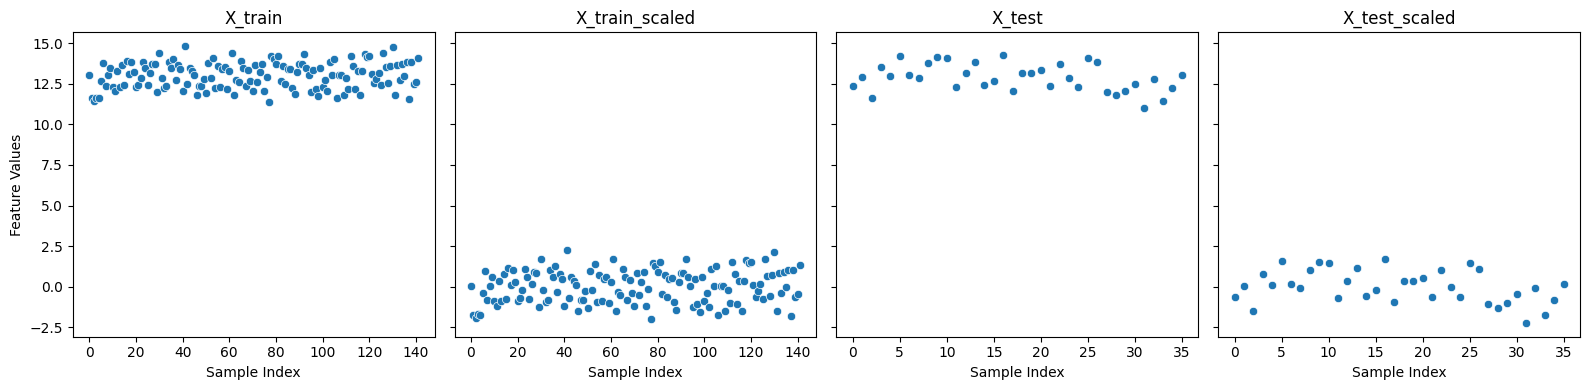

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

import matplotlib.pyplot as plt
import seaborn as sns

datasets = {
    'X_train': X_train,
    'X_train_scaled': X_train_scaled,
    'X_test': X_test,
    'X_test_scaled': X_test_scaled
}

feature_index = 0  # select the feature to compare

fig, axes = plt.subplots(1, len(datasets), figsize=(16, 4), sharey=True)

for ax, (label, data) in zip(axes, datasets.items()):
    sns.scatterplot(x=range(len(data[:, feature_index])), y=data[:, feature_index], ax=ax)
    ax.set_title(label)
    
ax.set_xlabel("Sample Index")    
axes[0].set_ylabel("Feature Values")  # set y-label on the first plot only
plt.tight_layout()
plt.show()


In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # adding dropout to reduce overfitting
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')  # assuming 3 classes
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=  ['accuracy']
)

In [40]:
history = model.fit(X_train_scaled, 
          y_train, 
          epochs=50, 
          batch_size=16, 
          validation_split=0.1, 
          verbose=1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.3339 - loss: 1.5697 - val_accuracy: 0.2667 - val_loss: 1.2053
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3243 - loss: 1.5501 - val_accuracy: 0.4667 - val_loss: 1.1086
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4183 - loss: 1.1754 - val_accuracy: 0.6000 - val_loss: 1.0183
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3862 - loss: 1.1513 - val_accuracy: 0.6000 - val_loss: 0.9442
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4204 - loss: 1.0700 - val_accuracy: 0.8000 - val_loss: 0.8783
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6694 - loss: 0.8749 - val_accuracy: 0.8000 - val_loss: 0.8142
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6558 - loss: 0.8132 - val_accuracy: 0.8667 - val_loss: 0.7559
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6331 - loss: 0.8176 - val_accuracy: 0.9333 - val_loss: 0.7025


In [41]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test accuracy: {accuracy:.2f}")
print(f"Test loss: {loss:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0207
Test accuracy: 1.00
Test loss: 0.02


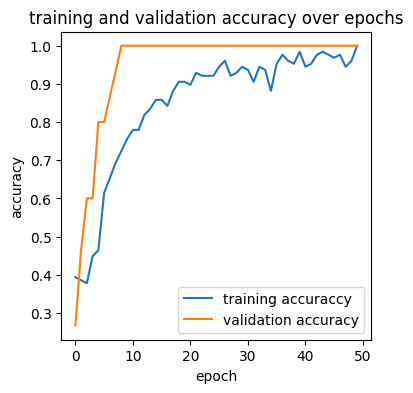

In [42]:
plt.figure(figsize=(4,4))
plt.plot(history.history['accuracy'], label='training accuraccy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title("training and validation accuracy over epochs")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


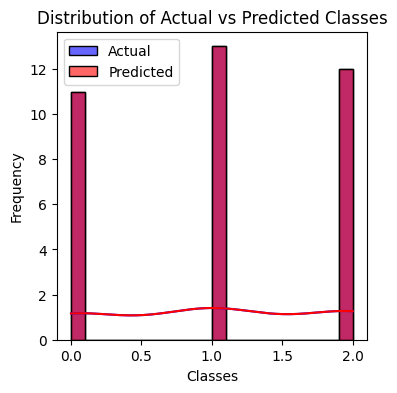

In [48]:
yhat = model.predict(X_test_scaled)

yhat_classes = yhat.argmax(axis=1)

plt.figure(figsize=(4,4))

sns.histplot(y_test, kde=True, label='Actual', color='blue', alpha=0.6, bins=20)
sns.histplot(yhat_classes, kde=True, label='Predicted', color='red', alpha=0.6, bins=20)
plt.title("Distribution of Actual vs Predicted Classes")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.legend()
plt.show()

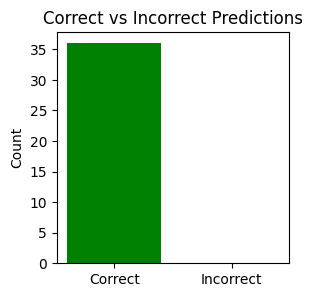

In [51]:
import numpy as np

correct = np.sum(yhat_classes == y_test)
incorrect = np.sum(yhat_classes != y_test)

plt.figure(figsize=(3,3))
plt.bar(["Correct", "Incorrect"], [correct, incorrect], color=["green", "red"])
plt.title("Correct vs Incorrect Predictions")
plt.ylabel("Count")
plt.show()


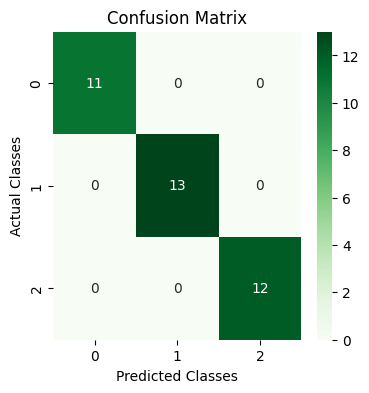

In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, yhat_classes)

# Plot the confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=range(3), yticklabels=range(3))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()